In [147]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [148]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = '../doc/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

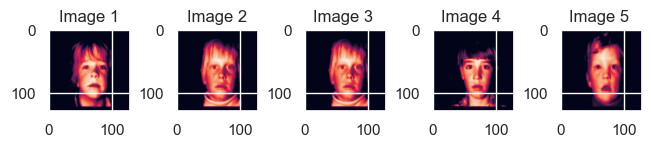

In [149]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()
plot_3_images(X,1, 2 , 3,4,5)

In [150]:
means =[]
for i in  X:
    mean2 = np.mean(i)
    means.append(mean2)
    print(mean2)

46.07855224609375
35.55621337890625
49.4178466796875
39.15753173828125
30.03277587890625
35.571533203125
26.32171630859375
38.58984375
21.16796875
30.052490234375
36.40301513671875
35.20465087890625
43.14947509765625
33.03790283203125
35.50823974609375
26.68914794921875
49.0501708984375
33.97247314453125
40.5340576171875
48.685546875
48.1298828125
30.13330078125
20.94036865234375
40.5166015625
21.37646484375
21.6202392578125
27.04693603515625
40.873779296875
24.08758544921875
22.31683349609375
32.957763671875
36.49847412109375
29.28369140625
35.56317138671875
32.38592529296875
41.44891357421875
31.20086669921875
32.86212158203125
25.67156982421875
18.925048828125
23.447265625
35.41986083984375
30.283203125
22.42333984375
28.80450439453125
39.2266845703125
24.6134033203125
27.6956787109375
29.2999267578125
33.4888916015625
22.02899169921875
39.8304443359375
24.2113037109375
36.90020751953125
67.978515625
34.02276611328125
37.2279052734375
41.6995849609375
42.2362060546875
18.02984619140

In [151]:
print(len(means))
print(means)

816
[46.07855224609375, 35.55621337890625, 49.4178466796875, 39.15753173828125, 30.03277587890625, 35.571533203125, 26.32171630859375, 38.58984375, 21.16796875, 30.052490234375, 36.40301513671875, 35.20465087890625, 43.14947509765625, 33.03790283203125, 35.50823974609375, 26.68914794921875, 49.0501708984375, 33.97247314453125, 40.5340576171875, 48.685546875, 48.1298828125, 30.13330078125, 20.94036865234375, 40.5166015625, 21.37646484375, 21.6202392578125, 27.04693603515625, 40.873779296875, 24.08758544921875, 22.31683349609375, 32.957763671875, 36.49847412109375, 29.28369140625, 35.56317138671875, 32.38592529296875, 41.44891357421875, 31.20086669921875, 32.86212158203125, 25.67156982421875, 18.925048828125, 23.447265625, 35.41986083984375, 30.283203125, 22.42333984375, 28.80450439453125, 39.2266845703125, 24.6134033203125, 27.6956787109375, 29.2999267578125, 33.4888916015625, 22.02899169921875, 39.8304443359375, 24.2113037109375, 36.90020751953125, 67.978515625, 34.02276611328125, 37.2

Mean Face

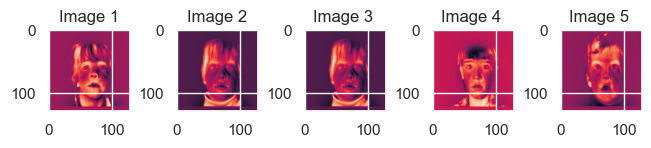

In [152]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3,4,5)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

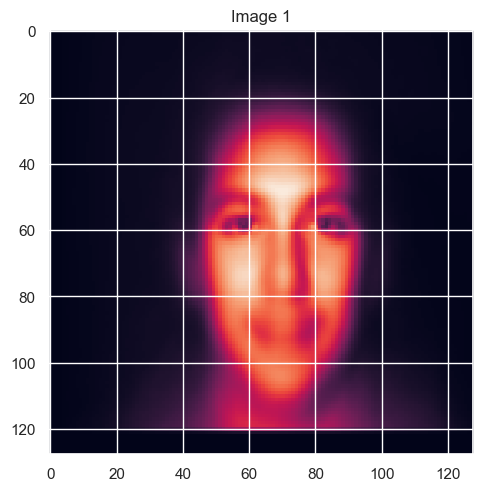

In [153]:
plot_1_images(X_mean)

matriz de covarianza

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [155]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [156]:
eigen_values

array([7.60330480e+06, 2.11305649e+06, 1.93356933e+06, 9.47477449e+05,
       8.58355041e+05, 8.19161623e+05, 5.71217326e+05, 4.32764580e+05,
       3.87915584e+05, 3.16815289e+05, 2.56474274e+05, 2.34609185e+05,
       2.24606586e+05, 1.96946334e+05, 1.74718932e+05, 1.66262453e+05,
       1.57590664e+05, 1.41379770e+05, 1.31831098e+05, 1.25714289e+05,
       1.20042893e+05, 1.14802677e+05, 1.07213410e+05, 9.77072606e+04,
       9.58980648e+04, 8.97451636e+04, 8.45262626e+04, 8.23094502e+04,
       7.93280859e+04, 7.31112531e+04, 7.16272601e+04, 7.06188068e+04,
       6.69593145e+04, 6.43112751e+04, 5.99773536e+04, 5.90115443e+04,
       5.79411081e+04, 5.57403760e+04, 5.12789715e+04, 5.03336208e+04,
       4.86486474e+04, 4.76608816e+04, 4.65373490e+04, 4.55248326e+04,
       4.50809776e+04, 4.33848985e+04, 4.08671770e+04, 3.90235407e+04,
       3.89820460e+04, 3.78191347e+04, 3.69227740e+04, 3.60808439e+04,
       3.49055756e+04, 3.38808398e+04, 3.33391743e+04, 3.28010438e+04,
      

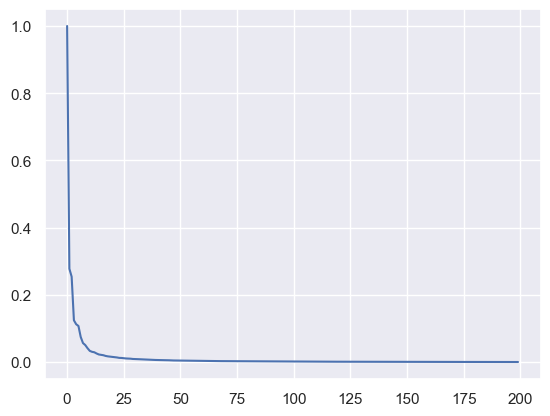

In [157]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

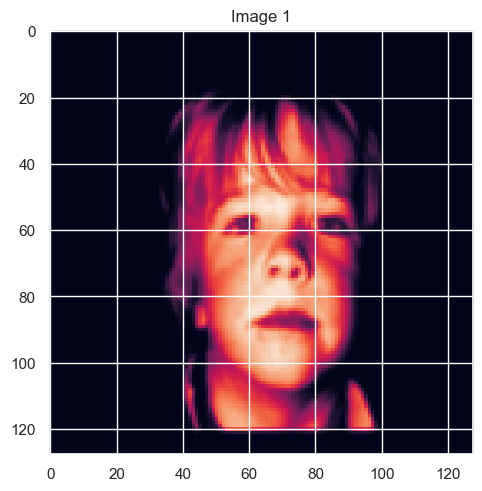

In [158]:
plot_1_images(X[1])

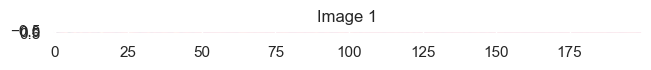

In [159]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
ax.imshow(X_reduced[1].reshape(1,-1))
ax.set_title(label="Image 1")
plt.show()

Reconstruir la imagen

In [160]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (816, 200)
Eigenvectores (200, 16384)
[-2.08375537e-11  1.20877838e-11 -8.37960688e-03 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [161]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

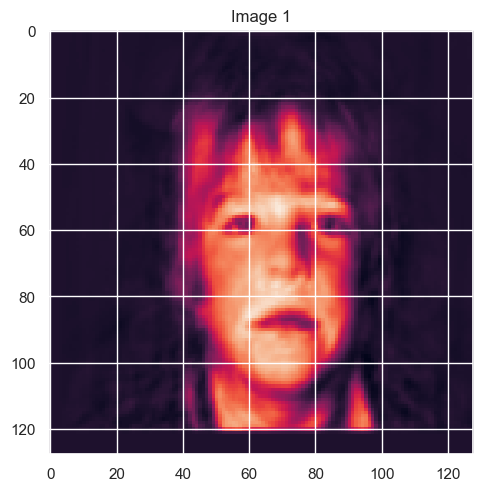

In [162]:
plot_1_images(X_mean + face_1.sum(axis=0) )

In [163]:
def variancePorcentaje(porcentage, values):
    actual =0
    suma=0
    for a in range(len(values)):
        suma = suma + values[a]
    for i in range(len(values)):
        actual =  actual +  values[i]/suma
        if actual>= porcentage:
            return i
print(f"el 90% de la vairianza se explica en los primeros {variancePorcentaje(0.9, eigen_values)} eigen_values")
print(f"el 99% de la varianza se explica en los primeros {variancePorcentaje(0.99, eigen_values)} eigen_values")

el 90% de la vairianza se explica en los primeros 44 eigen_values
el 99% de la varianza se explica en los primeros 160 eigen_values


(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

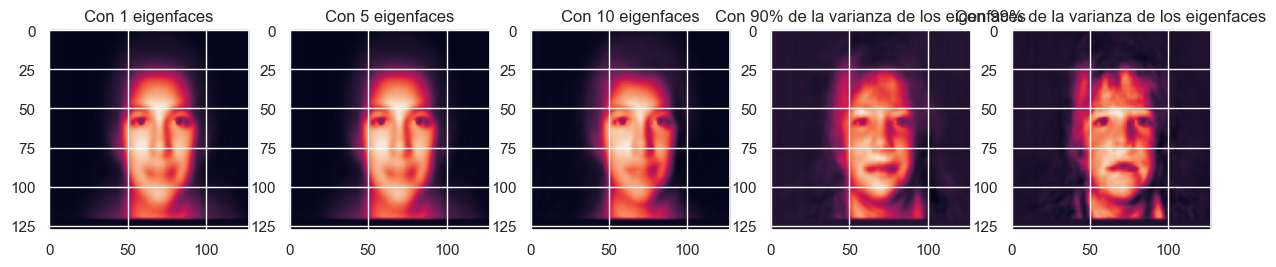

In [164]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

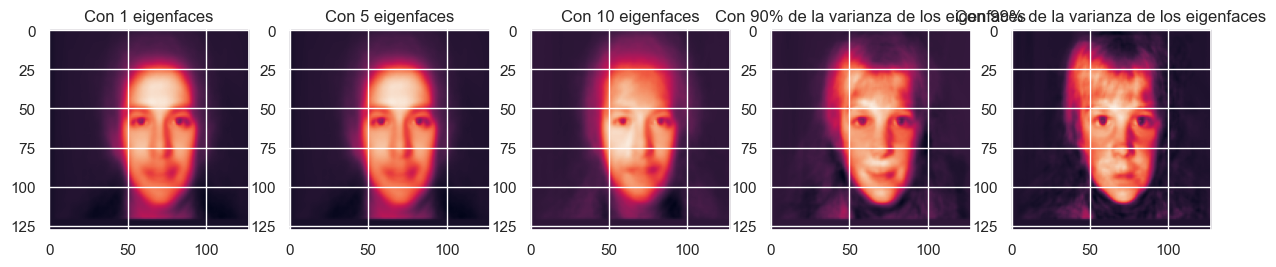

In [165]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

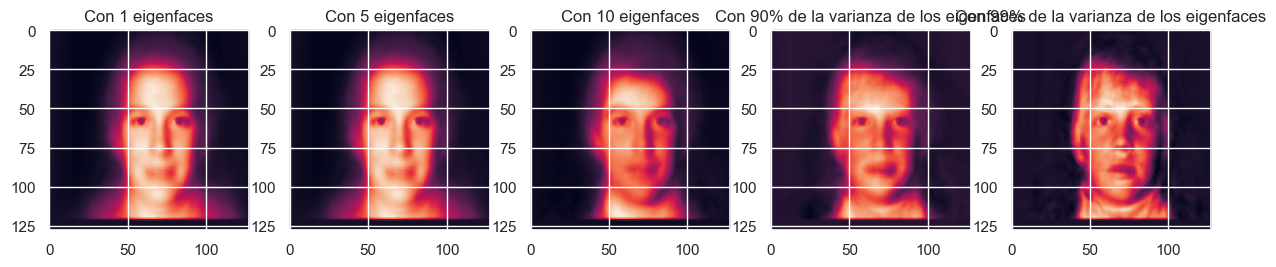

In [166]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

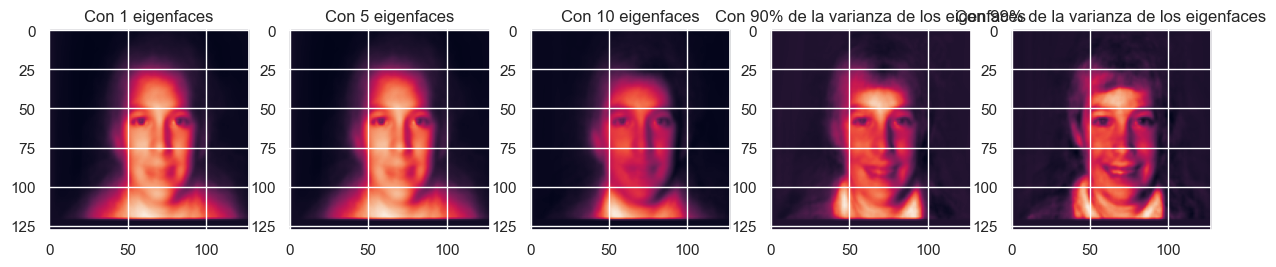

In [167]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

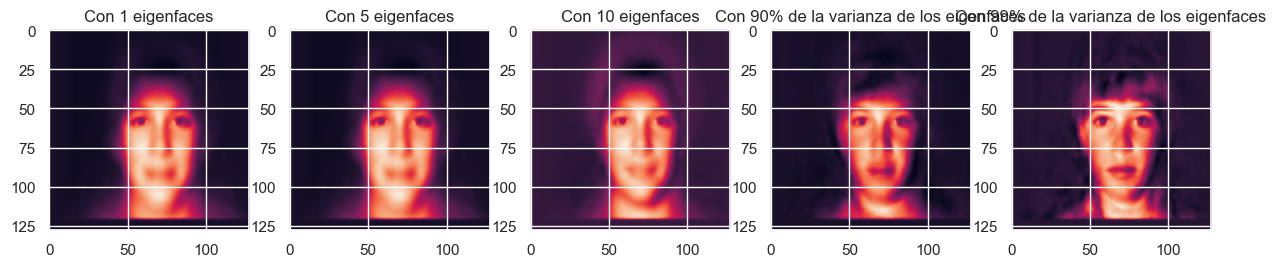

In [168]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

## Punto 2 kmeans

In [169]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        # Using Distance formula -2X*MU  + X^2 + MU^2
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

Explained variation per principal component: 0.015075376884422127
[[ 1.96582691e-02  1.64238098e-01  2.00070656e-03]
 [-6.58551123e-02 -3.33758426e-02 -1.34790703e-02]
 [-1.14598491e-01 -3.36050565e-02  1.05845713e-01]
 [ 6.23927044e-02  1.93395556e-01 -6.00016156e-02]
 [ 8.40996414e-03 -1.09714120e-01  6.76626883e-02]
 [-3.22189025e-02 -3.71211476e-02 -2.13628910e-02]
 [ 4.51200727e-02  1.05653342e-01  5.27782698e-03]
 [ 1.55917425e-01  2.01072020e-02 -4.87296918e-02]
 [ 5.09106525e-02  1.09415911e-02 -5.32985366e-03]
 [-8.08495575e-02 -3.96740150e-02 -1.25066520e-01]
 [-6.07243706e-02 -3.60062697e-02  1.75315200e-01]
 [-1.85138567e-02 -6.34934418e-02  3.93555170e-02]
 [-8.61830137e-02  3.99017624e-02 -1.52474791e-02]
 [-7.23859245e-02  6.89647131e-02 -6.80716412e-02]
 [ 5.06834143e-02  8.19413120e-02 -2.27482098e-02]
 [-7.59185786e-02  8.34316281e-02  7.40435981e-03]
 [ 7.03740274e-03 -3.00293588e-02 -5.83882852e-02]
 [-2.25875595e-02 -1.21377606e-02  1.03853682e-01]
 [ 8.06435981e-0

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


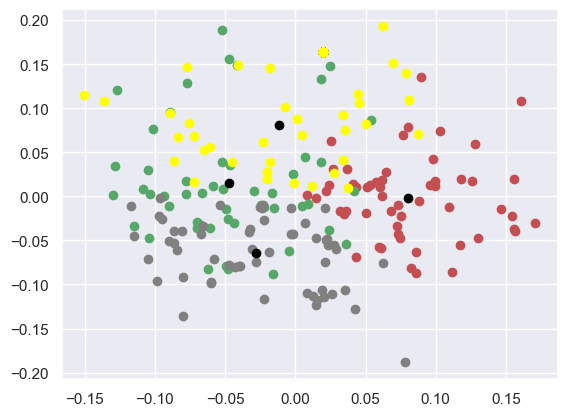

In [170]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr

X_r, X_nr = reduce_dim_pca(3,eigen_faces,eigen_faces)
k =5
print(X_r)
kmeans = Kmeans(k)
kmeans.train(X_r)
labels = kmeans.predict(X_r)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='yellow')
ax.scatter(X_r[np.where(label==5),0],X_r[np.where(label==5),1],c='brown')
ax.scatter(kmeans.mu[:,0],
           kmeans.mu[:,1], c='black')